In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import re

In [2]:
df=pd.read_csv(r"dataSets/Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

### Understanding The Data

**`area_type`**

In [5]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [6]:
df['total_sqft'].dtype

dtype('O')

In [7]:
df['total_sqft'].isnull().sum()

np.int64(0)

No null values in 'total_sqft' column

Since area_type directly related to area of the house/plot. We will plot area with area_type to get the idea how they are differnt. Luckily we have "total_sqft" column which gives the area.

In [8]:
df['total_sqft'].head()

0    1056
1    2600
2    1440
3    1521
4    1200
Name: total_sqft, dtype: object

In [9]:
df['total_sqft'].dtype

dtype('O')

Area must be a numeric datatype, but here it is object type. Also converting it to float gives `ValueError: could not convert string to float: '2100 - 2850'`.
So there must some values with a range. Checking how many of them.


In [10]:
# since ranges contains "-" we will check how many of them are there
df['total_sqft'].str.contains("-", case=False).sum()

np.int64(201)

In [11]:
rng_df = df[['total_sqft','area_type','price']][df['total_sqft'].str.contains("-", case=False)]
print(len(rng_df))
rng_df.sample(5)

201


,total_sqft,area_type,price
2809,1200 - 2400,Plot Area,28.785
6587,840 - 1010,Super built-up Area,40.700
6769,1408 - 1455,Super built-up Area,72.020
10467,2650 - 2990,Super built-up Area,153.500
9476,706 - 716,Super built-up Area,42.650


for now i will take the average and try to see if it make sense or not

<Axes: xlabel='mid_total_sqft', ylabel='price'>

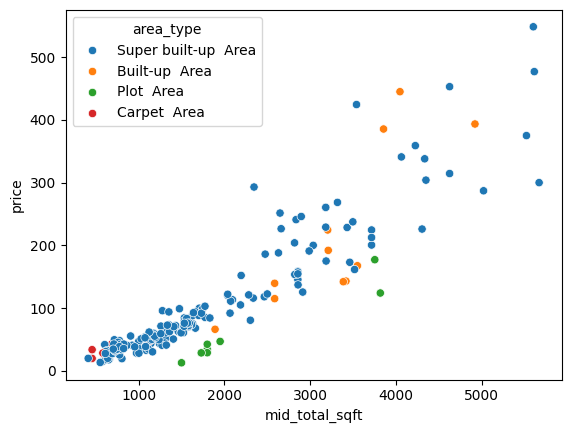

In [12]:
rng_df['mid_total_sqft'] = rng_df['total_sqft'].apply(lambda x: (float(x.split("-")[0]) + float(x.split("-")[1]))/2)

sns.scatterplot(data=rng_df, x='mid_total_sqft', y='price',hue='area_type')

We can see a linear realtionship between price and the total_sqft

<Axes: xlabel='low_total_sqft', ylabel='price'>

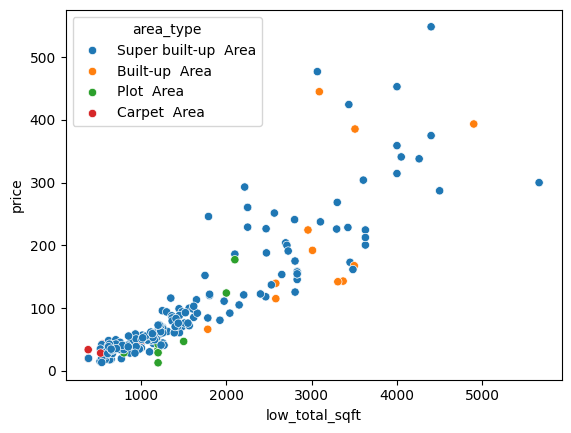

In [13]:
rng_df['low_total_sqft'] = rng_df['total_sqft'].apply(lambda x: float(x.split("-")[0]))

sns.scatterplot(data=rng_df, x='low_total_sqft', y='price',hue='area_type')

<Axes: xlabel='high_total_sqft', ylabel='price'>

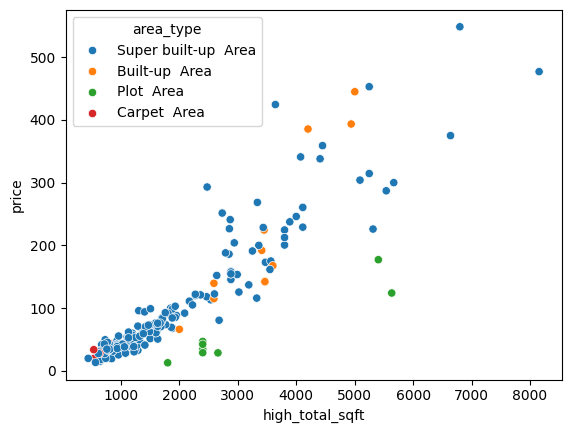

In [14]:
rng_df['high_total_sqft'] = rng_df['total_sqft'].apply(lambda x: float(x.split("-")[1]))

sns.scatterplot(data=rng_df, x='high_total_sqft', y='price',hue='area_type')

I will go with the mid of the range. idk why?

In [67]:
pattern = r'[-+]?(?:\d*\.\d+|\d+)(?:[-+]?\d+)?'
temo_df = df['total_sqft'].apply(lambda x: np.mean(np.float32(re.findall(pattern, x))))

In [68]:
re.findall(pattern, '34.46 -Float.13.53')

['34.46', '.13', '.53']

In [59]:
temo_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
13320 non-null  float32
dtypes: float32(1)
memory usage: 52.2 KB


In [60]:
temo_df.isnull().sum()

np.int64(0)

In [61]:
temo_df

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float32

In [ ]:
import re
[float(m) for m in re.findall(r'[-+]?\d+\.\d+', '34.46 - 13.53')]

[34.46, 13.53]

In [31]:
np.mean(np.float32(re.findall(r'[-+]?\d+\.\d+', '34.46 -Float.13.53')))

np.float32(23.994999)

In [16]:
aaaaaaaaaaaaa

NameError: name 'aaaaaaaaaaaaa' is not defined

In [ ]:
df['total_sqft'].astype(float)

In [ ]:

df['total_sqft'].str.contains("-", case=False).sum()

In [ ]:
[df['total_sqft']==].astype(float,errors='coerce').unique()

In [ ]:
df['total_sqft'].astype(float,errors='ignore')==

In [ ]:
df.shape

In [ ]:
asasasasa

In [ ]:
([ x for x in df['total_sqft'].astype(str) if "-" in x])

In [ ]:
df["-" in df['total_sqft']]

?????? what the data tells

**availability**

In [ ]:
df['availability'].str.lower().value_counts()